In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [56]:
df = pd.read_csv('50_Startups.csv') 

In [57]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [58]:
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


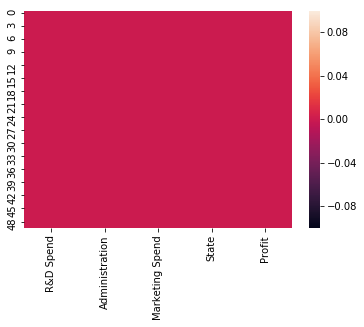

In [16]:
sns.heatmap(df.isnull())#To check if null exist(also can check by df.info())

In [59]:
x=df.iloc[:,:4]
y=df.iloc[:,4:]
#Now we convert categorical values into integers and also remove dummy variables 
city=pd.get_dummies(df['State'],drop_first=True)
x=pd.concat([city,df.iloc[:,:4]],axis=1)
x=x.drop(['State'],axis=1)



In [60]:
#We also have to add a constant/bias in dataset
c = np.ones([length])
bias = pd.Series(c)
bias=pd.to_numeric(bias,errors='coerce')
x=pd.concat([bias,x.iloc[:,:6]],axis=1)


In [68]:
print(x)

      0  Florida  New York  R&D Spend  Administration  Marketing Spend
0   1.0        0         1  165349.20       136897.80        471784.10
1   1.0        0         0  162597.70       151377.59        443898.53
2   1.0        1         0  153441.51       101145.55        407934.54
3   1.0        0         1  144372.41       118671.85        383199.62
4   1.0        1         0  142107.34        91391.77        366168.42
5   1.0        0         1  131876.90        99814.71        362861.36
6   1.0        0         0  134615.46       147198.87        127716.82
7   1.0        1         0  130298.13       145530.06        323876.68
8   1.0        0         1  120542.52       148718.95        311613.29
9   1.0        0         0  123334.88       108679.17        304981.62
10  1.0        1         0  101913.08       110594.11        229160.95
11  1.0        0         0  100671.96        91790.61        249744.55
12  1.0        1         0   93863.75       127320.38        249839.44
13  1.

In [69]:
w=np.linalg.solve(np.dot(x.T,x),np.dot(x.T,y))#calculate weights
ypred=np.dot(x,w)

In [70]:
from sklearn.metrics import r2_score
r2_score(y, ypred) 

0.9507524843355148

In [71]:
#Now we apply backward elimination process to remove independet variable which are not contributing significantly in our data

In [72]:
import statsmodels.formula.api as sm

In [81]:
x_opt=x.iloc[:,[0,1,2,3,4,5]]

In [85]:
ols=sm.OLS(endog=y,exog=x_opt).fit()#We fit our model with ordinary least square method(ols)
ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     169.9
Date:                Thu, 22 Aug 2019   Prob (F-statistic):           1.34e-27
Time:                        19:52:48   Log-Likelihood:                -525.38
No. Observations:                  50   AIC:                             1063.
Df Residuals:                      44   BIC:                             1074.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
0                5.013e+04   6884.820      7.281      0.000    3.62e+04     6.4e+04
Florida           198.7888   3371.007      0.059      0.953   -6595.030    6992.607
New York          -41.8870   3256.039     -0.013      0.990   -6604.003    6520.229
R&D Spend           0.8060      0.046     17.369      0.000       0.712       0.900
Administration     -0.0270      0.052     -0.517      0.608      -0.132       0.078
Marketing Spend     0.0270      0.017      1.574      0.123      -0.008       0.062
==============================================================================
Omnibus:                       14.782   Durbin-Watson:                   1.283
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.266
Skew:                          -0.948   Prob(JB):                     2.41e-05
Kurtosis:                       5.572   Cond. No.                     1.45e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.45e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [86]:
#We take a significant level of 0.05. Usually we take a significant level of (0.01,0.05,0.1)
#Now we remove a feature which significant value is greater then 0.05 we can cleary see the significant value of Newyork is 0.990 so we will remove it.


x_opt=x.iloc[:,[0,1,3,4,5]]
ols=sm.OLS(endog=y,exog=x_opt).fit()
ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     217.2
Date:                Thu, 22 Aug 2019   Prob (F-statistic):           8.49e-29
Time:                        19:58:51   Log-Likelihood:                -525.38
No. Observations:                  50   AIC:                             1061.
Df Residuals:                      45   BIC:                             1070.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
0                5.011e+04   6647.870      7.537      0.000    3.67e+04    6.35e+04
Florida           220.1585   2900.536      0.076      0.940   -5621.821    6062.138
R&D Spend           0.8060      0.046     17.606      0.000       0.714       0.898
Administration     -0.0270      0.052     -0.523      0.604      -0.131       0.077
Marketing Spend     0.0270      0.017      1.592      0.118      -0.007       0.061
==============================================================================
Omnibus:                       14.758   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.172
Skew:                          -0.948   Prob(JB):                     2.53e-05
Kurtosis:                       5.563   Cond. No.                     1.40e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [87]:
#Same process as last one
x_opt=x.iloc[:,[0,3,4,5]]
ols=sm.OLS(endog=y,exog=x_opt).fit()
ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Thu, 22 Aug 2019   Prob (F-statistic):           4.53e-30
Time:                        19:59:29   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
0                5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
R&D Spend           0.8057      0.045     17.846      0.000       0.715       0.897
Administration     -0.0268      0.051     -0.526      0.602      -0.130       0.076
Marketing Spend     0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [88]:
#Same process as last one
x_opt=x.iloc[:,[0,3,5]]
ols=sm.OLS(endog=y,exog=x_opt).fit()
ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     450.8
Date:                Thu, 22 Aug 2019   Prob (F-statistic):           2.16e-31
Time:                        20:00:37   Log-Likelihood:                -525.54
No. Observations:                  50   AIC:                             1057.
Df Residuals:                      47   BIC:                             1063.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
0                4.698e+04   2689.933     17.464      0.000    4.16e+04    5.24e+04
R&D Spend           0.7966      0.041     19.266      0.000       0.713       0.880
Marketing Spend     0.0299      0.016      1.927      0.060      -0.001       0.061
==============================================================================
Omnibus:                       14.677   Durbin-Watson:                   1.257
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.161
Skew:                          -0.939   Prob(JB):                     2.54e-05
Kurtosis:                       5.575   Cond. No.                     5.32e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.32e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [89]:
#Same process as last one
x_opt=x.iloc[:,[0,3]]
ols=sm.OLS(endog=y,exog=x_opt).fit()
ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     849.8
Date:                Thu, 22 Aug 2019   Prob (F-statistic):           3.50e-32
Time:                        20:00:56   Log-Likelihood:                -527.44
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      48   BIC:                             1063.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
0           4.903e+04   2537.897     19.320      0.000    4.39e+04    5.41e+04
R&D Spend      0.8543      0.029     29.151      0.000       0.795       0.913
==============================================================================
Omnibus:                       13.727   Durbin-Watson:                   1.116
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               18.536
Skew:                          -0.911   Prob(JB):                     9.44e-05
Kurtosis:                       5.361   Cond. No.                     1.65e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.65e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
#So our final result show that the profit mostly depent on R&D Spend.